# ***Libraries***

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [242]:
totyota=pd.read_csv("ToyotaCorolla.csv", encoding="unicode_escape")
totyota= totyota.drop("Id", axis=1)
corolla=totyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla.head()
corolla.duplicated().sum()
corolla=corolla.drop_duplicates()

As we need to consider only Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")] columns so dropped remaining

In [243]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [244]:
corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [245]:
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


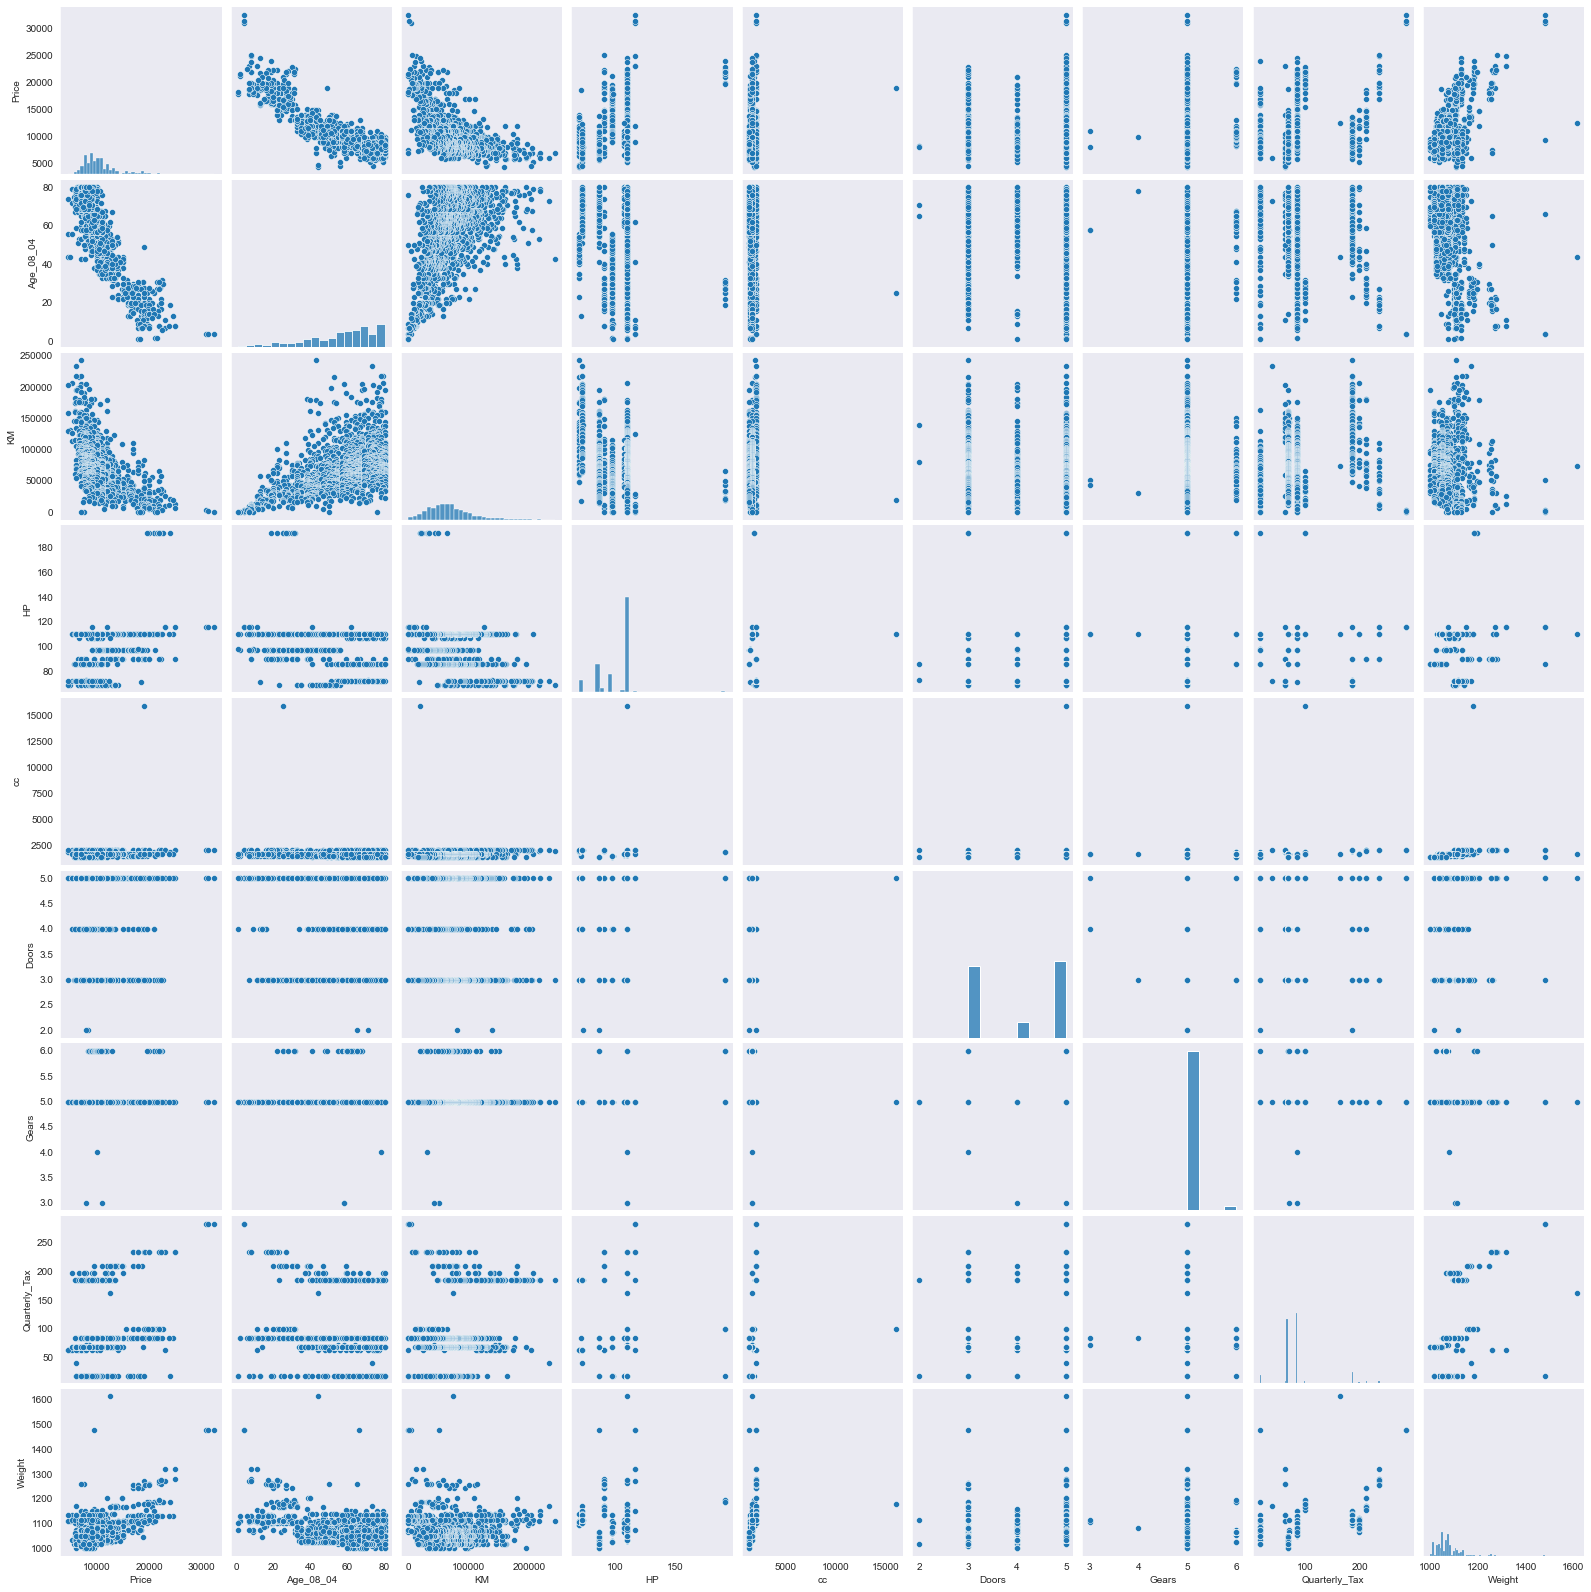

In [246]:
sns.set_style(style="dark")
sns.pairplot(corolla)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dde3bb4730>,
 'caps': [<matplotlib.lines.Line2D at 0x1dde3b95250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dde3bb4a00>,
 'medians': [<matplotlib.lines.Line2D at 0x1dde3b95970>,
 'fliers': [<matplotlib.lines.Line2D at 0x1dde3b95d00>,
 'means': []}

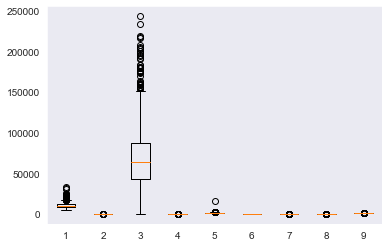

In [247]:
plt.boxplot(corolla)

### Defining Custom functions to remove outliers

In [248]:
def outlier_price(corolla):
    column=plt.boxplot(corolla["Price"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]]
    c_max=corolla["Price"].max()
    c_min=corolla["Price"].min()
    while whisker[1] < c_max or whisker[0] > c_min:
        corolla1=corolla.loc[(corolla["Price"]<=whisker[1]) & (corolla["Price"]>=whisker[0])]
        column=plt.boxplot(corolla["Price"])
        [item.get_ydata()for item in column["fliers"]]
        c_max=corolla1["Price"].max()
        c_min=corolla1["Price"].max()
        column=plt.boxplot(corolla1["Price"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]]
        corolla=corolla1
    else:
        return corolla

In [249]:
## this function remove outlier for both the whiskers
def outlier_age(corolla):
    column=plt.boxplot(corolla["Age_08_04"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]]
    c_max=corolla["Age_08_04"].max()
    c_min=corolla["Age_08_04"].min()
    while whisker[1] < c_max or whisker[0] > c_min:
        corolla1=corolla.loc[(corolla["Age_08_04"]<=whisker[1]) & (corolla["Age_08_04"]>=whisker[0])]
        column=plt.boxplot(corolla["Age_08_04"])
        [item.get_ydata()for item in column["fliers"]]
        c_max=corolla1["Age_08_04"].max()
        c_min=corolla1["Age_08_04"].max()
        column=plt.boxplot(corolla1["Age_08_04"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]]
        corolla=corolla1
    else:
        return corolla

In [250]:

## this function remove outlier for both the whiskers
def outlier_km(corolla):
    column=plt.boxplot(corolla["KM"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]]
    c_max=corolla["KM"].max()
    c_min=corolla["KM"].min()
    while whisker[1] < c_max or whisker[0] > c_min:
        corolla1=corolla.loc[(corolla["KM"]<=whisker[1]) & (corolla["KM"]>=whisker[0])]
        column=plt.boxplot(corolla["KM"])
        [item.get_ydata()for item in column["fliers"]]
        c_max=corolla1["KM"].max()
        c_min=corolla1["KM"].max()
        column=plt.boxplot(corolla1["KM"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]]
        corolla=corolla1
    else:
        return corolla

    

In [251]:

## this function remove outlier for both the whiskers
def outlier_hp(corolla):
    column=plt.boxplot(corolla["HP"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]]
    c_max=corolla["HP"].max()
    c_min=corolla["HP"].min()
    while whisker[1] < c_max or whisker[0] > c_min:
        corolla1=corolla.loc[(corolla["HP"]<=whisker[1]) & (corolla["HP"]>=whisker[0])]
        column=plt.boxplot(corolla["HP"])
        [item.get_ydata()for item in column["fliers"]]
        c_max=corolla1["HP"].max()
        c_min=corolla1["HP"].max()
        column=plt.boxplot(corolla1["HP"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]]
        corolla=corolla1
    else:
        return corolla

    

In [252]:

## this function remove outlier for both the whiskers
def outlier_cc(corolla):
    column=plt.boxplot(corolla["cc"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]]
    c_max=corolla["cc"].max()
    c_min=corolla["cc"].min()
    while whisker[1] < c_max or whisker[0] > c_min:
        corolla1=corolla.loc[(corolla["cc"]<=whisker[1]) & (corolla["cc"]>=whisker[0])]
        column=plt.boxplot(corolla["cc"])
        [item.get_ydata()for item in column["fliers"]]
        c_max=corolla1["cc"].max()
        c_min=corolla1["cc"].max()
        column=plt.boxplot(corolla1["cc"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]]
        corolla=corolla1
    else:
        return corolla

    

In [253]:

## this function remove outlier for both the whiskers
def outlier_door(corolla):
    column=plt.boxplot(corolla["Doors"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]]
    c_max=corolla["Doors"].max()
    c_min=corolla["Doors"].min()
    while whisker[1] < c_max or whisker[0] > c_min:
        corolla1=corolla.loc[(corolla["Doors"]<=whisker[1]) & (corolla["Doors"]>=whisker[0])]
        column=plt.boxplot(corolla["Doors"])
        [item.get_ydata()for item in column["fliers"]]
        c_max=corolla1["Doors"].max()
        c_min=corolla1["Doors"].max()
        column=plt.boxplot(corolla1["Doors"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]]
        corolla=corolla1
    else:
        return corolla

    

In [254]:

## this function remove outlier for both the whiskers
def outlier_gears(corolla):
    column=plt.boxplot(corolla["Gears"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]]
    c_max=corolla["Gears"].max()
    c_min=corolla["Gears"].min()
    while whisker[1] < c_max or whisker[0] > c_min:
        corolla1=corolla.loc[(corolla["Gears"]<=whisker[1]) & (corolla["Gears"]>=whisker[0])]
        column=plt.boxplot(corolla["Gears"])
        [item.get_ydata()for item in column["fliers"]]
        c_max=corolla1["Gears"].max()
        c_min=corolla1["Gears"].max()
        column=plt.boxplot(corolla1["Gears"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]]
        corolla=corolla1
    else:
        return corolla

    

In [255]:

## this function remove outlier for both the whiskers
def outlier_tax(corolla):
    column=plt.boxplot(corolla["Quarterly_Tax"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]]
    c_max=corolla["Quarterly_Tax"].max()
    c_min=corolla["Quarterly_Tax"].min()
    while whisker[1] < c_max or whisker[0] > c_min:
        corolla1=corolla.loc[(corolla["Quarterly_Tax"]<=whisker[1]) & (corolla["Quarterly_Tax"]>=whisker[0])]
        column=plt.boxplot(corolla["Quarterly_Tax"])
        [item.get_ydata()for item in column["fliers"]]
        c_max=corolla1["Quarterly_Tax"].max()
        c_min=corolla1["Quarterly_Tax"].max()
        column=plt.boxplot(corolla1["Quarterly_Tax"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]]
        corolla=corolla1
    else:
        return corolla

    

In [256]:

## this function remove outlier for both the whiskers
def outlier_weight(corolla):
    column=plt.boxplot(corolla["Weight"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]]
    c_max=corolla["Weight"].max()
    c_min=corolla["Weight"].min()
    while whisker[1] < c_max or whisker[0] > c_min:
        corolla1=corolla.loc[(corolla["Weight"]<=whisker[1]) & (corolla["Weight"]>=whisker[0])]
        column=plt.boxplot(corolla["Weight"])
        [item.get_ydata()for item in column["fliers"]]
        c_max=corolla1["Weight"].max()
        c_min=corolla1["Weight"].max()
        column=plt.boxplot(corolla1["Weight"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]]
        corolla=corolla1
    else:
        return corolla

Dataset has Several outliers so We will build model one with outlier and other one without it to test the accuracy and we'll remove outlier with the help of cook's distance

## Normal Model

In [257]:
corolla.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [258]:
model=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", corolla).fit()

In [259]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:33:51   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [260]:
np.round(model.pvalues, 4)

Intercept        0.0001
Age_08_04        0.0000
KM               0.0000
HP               0.0000
cc               0.1882
Doors            0.9816
Gears            0.0025
Quarterly_Tax    0.0033
Weight           0.0000
dtype: float64

CC and doors features have high pvalues which needs to be treated

Calculating VIF

In [261]:
corolla.head(1)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165


In [262]:
rsq_age=smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", corolla).fit().rsquared
vif_age=1/(1-rsq_age)
#
rsq_km=smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight", corolla).fit().rsquared
vif_km=1/(1-rsq_km)
#
rsq_hp=smf.ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight", corolla).fit().rsquared
vif_hp=1/(1-rsq_hp)

#
rsq_cc=smf.ols("cc~Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax+Weight", corolla).fit().rsquared
vif_cc=1/(1-rsq_cc)

#
rsq_doors=smf.ols("Doors~Age_08_04+HP+cc+KM+Gears+Quarterly_Tax+Weight", corolla).fit().rsquared
vif_doors=1/(1-rsq_doors)
#
rsq_gears=smf.ols("Gears~Age_08_04+HP+cc+Doors+KM+Quarterly_Tax+Weight", corolla).fit().rsquared
vif_gears=1/(1-rsq_gears)

#
rsq_tax=smf.ols("Quarterly_Tax~Age_08_04+HP+cc+Doors+Gears+KM+Weight", corolla).fit().rsquared
vif_tax=1/(1-rsq_tax)
#
rsq_weight=smf.ols("Weight~Age_08_04+HP+cc+Doors+Gears+KM+Quarterly_Tax", corolla).fit().rsquared
vif_weight=1/(1-rsq_weight)

d1={"variable":["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_tax","Weight"], "VIF":[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_tax, vif_weight]}
VIF=pd.DataFrame(d1)
VIF


,variable,VIF
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_tax,2.295375
7,Weight,2.487180


All the Variable VIF values are less than 20 so can not drop any on the basis of VIF

Text(0.5, 1.0, 'Normal QQ plot of Reisdual')

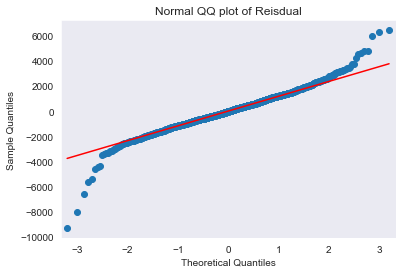

In [263]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line="q")
plt.title("Normal QQ plot of Reisdual")

In [264]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057], dtype=int64)]

In [265]:
list(np.where(model.resid<-4000))

[array([190, 191, 220, 392, 401, 600, 653, 959], dtype=int64)]

In [266]:
def standardised_values(vals):
    return (vals-vals.mean())/vals.std()

In [267]:
from sklearn.preprocessing import StandardScaler
standardization=StandardScaler()
corrolla_standar=standardization.fit_transform(corolla)


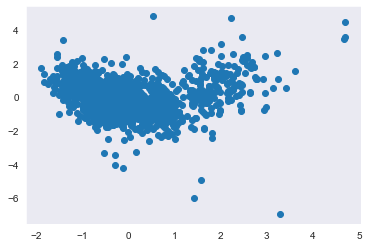

In [268]:
plt.scatter(standardised_values(model.fittedvalues), standardised_values(model.resid))

In [269]:
corolla.head(1)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165


eval_env: 1


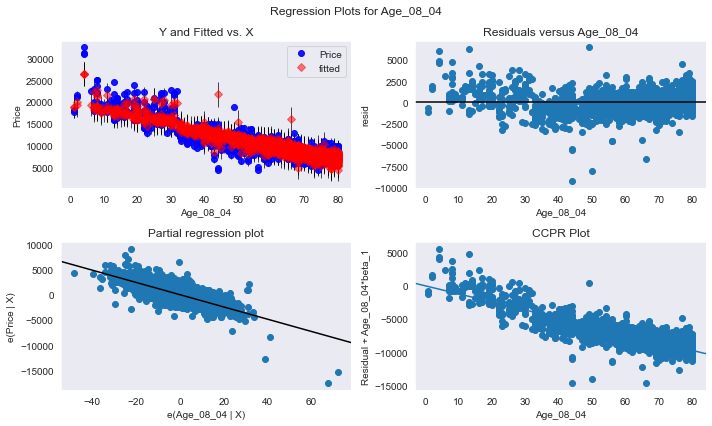

In [270]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(model,"Age_08_04", fig=fig)
plt.show()

eval_env: 1


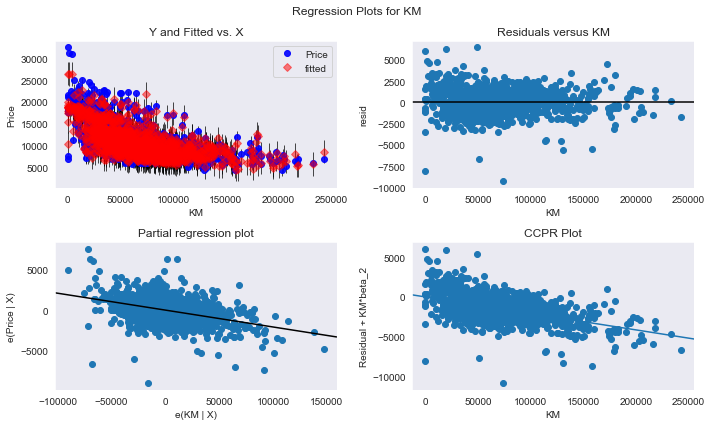

In [271]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(model,"KM", fig=fig)
plt.show()

eval_env: 1


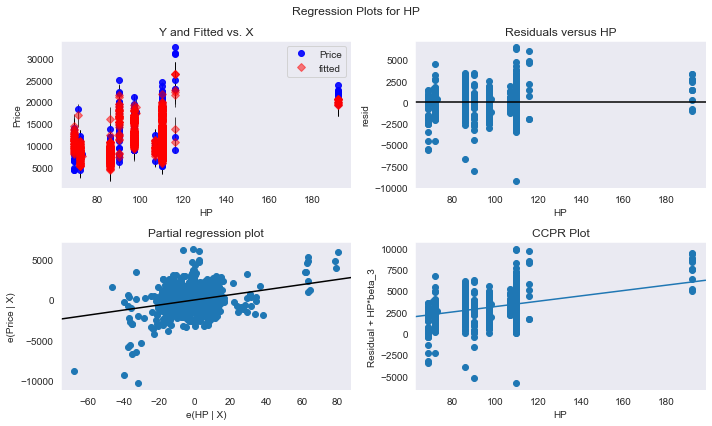

In [272]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(model,"HP", fig=fig)
plt.show()

eval_env: 1


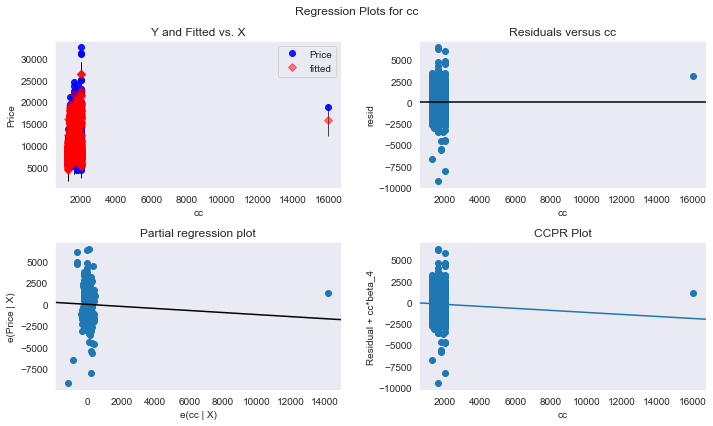

In [273]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(model,"cc", fig=fig)
plt.show()

eval_env: 1


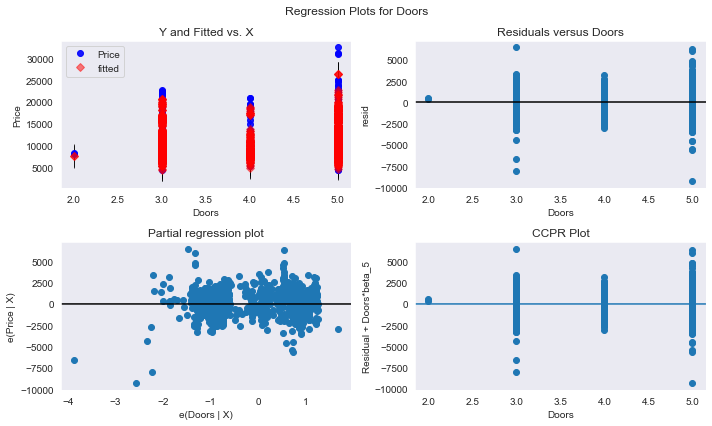

In [274]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(model,"Doors", fig=fig)
plt.show()

eval_env: 1


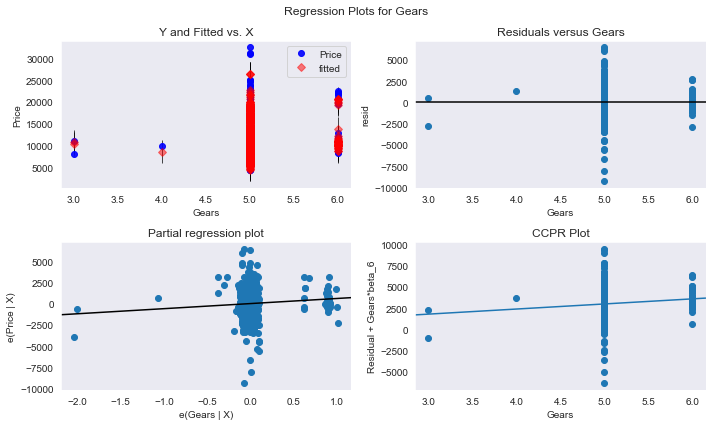

In [275]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(model,"Gears", fig=fig)
plt.show()

eval_env: 1


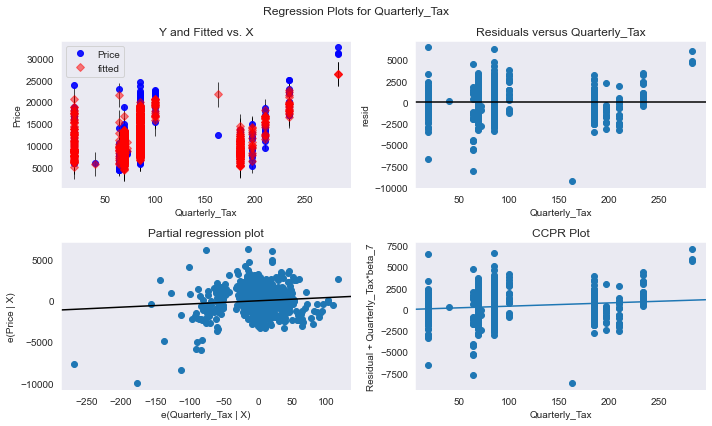

In [276]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(model,"Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


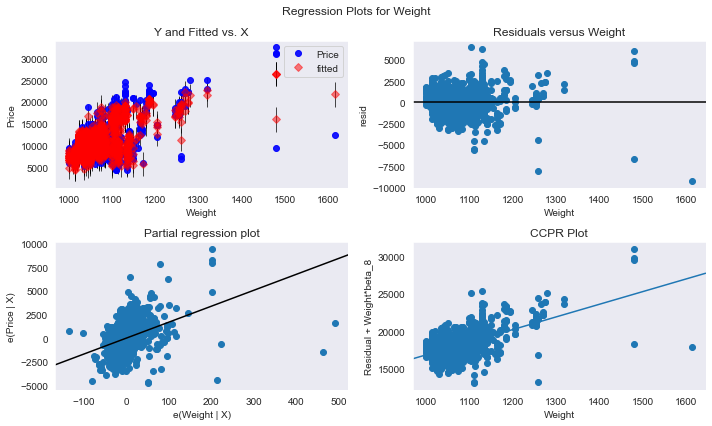

In [277]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(model,"Weight", fig=fig)
plt.show()

In [278]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

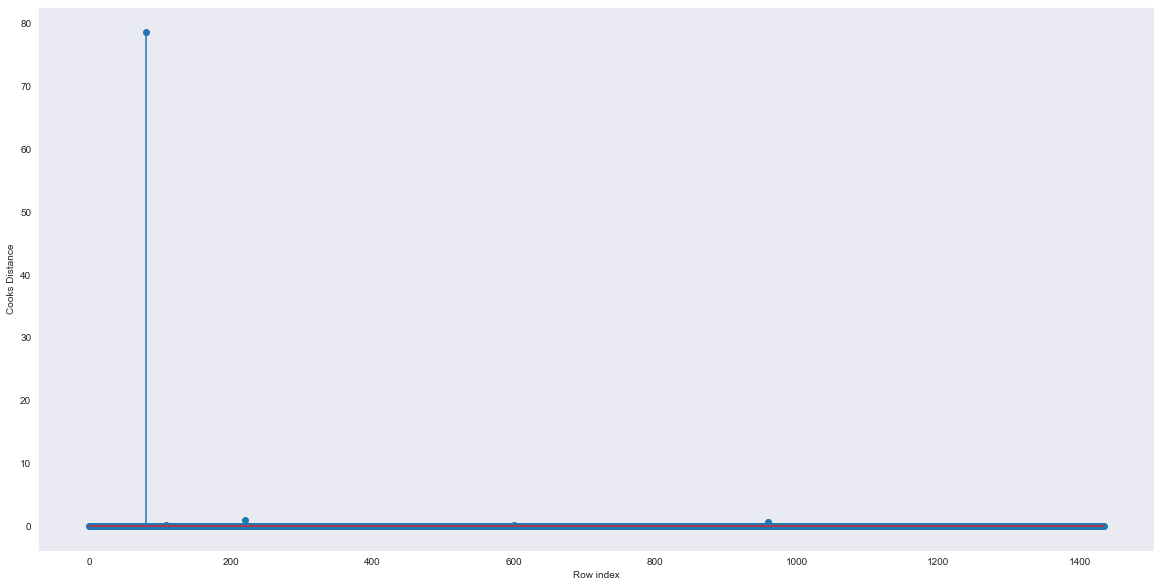

In [279]:
fig = plt.subplots(figsize=(20, 10))
plt.stem(np.arange(len(corolla)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [280]:
(np.argmax(c),np.max(c))

(80, 78.72950582258598)

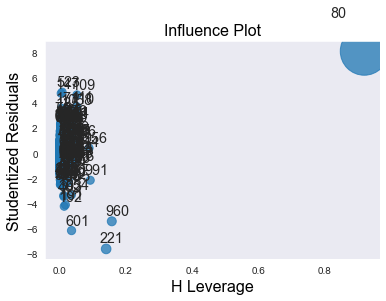

In [281]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [282]:
k = corolla.shape[1]
n = corolla.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

In [283]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057], dtype=int64)]

In [284]:
model.fittedvalues

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1431     8794.255037
1432     8292.577342
1433     8455.434402
1434     8579.222041
1435    10396.087526
Length: 1435, dtype: float64

In [285]:
influence=model.get_influence()
influence

In [286]:
inf_sum=influence.summary_frame()
inf_sum.head(2)

,dfb_Intercept,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.039757,0.044125,0.059647,-0.001706,-0.014444,0.095786,0.022500,-0.155546,0.021622,0.007222,-2.466454,0.010572,-0.254951,-2.470865,-0.255407
1,-0.033433,0.058466,-0.000411,-0.010377,-0.007738,0.074079,0.020493,-0.106563,0.018234,0.003945,-1.875391,0.009995,-0.188439,-1.877049,-0.188606


In [287]:
student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

Leverage vs. Studentized Residuals


C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Studentized Residuals')

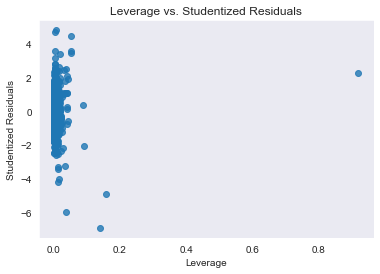

In [288]:
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, model.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')


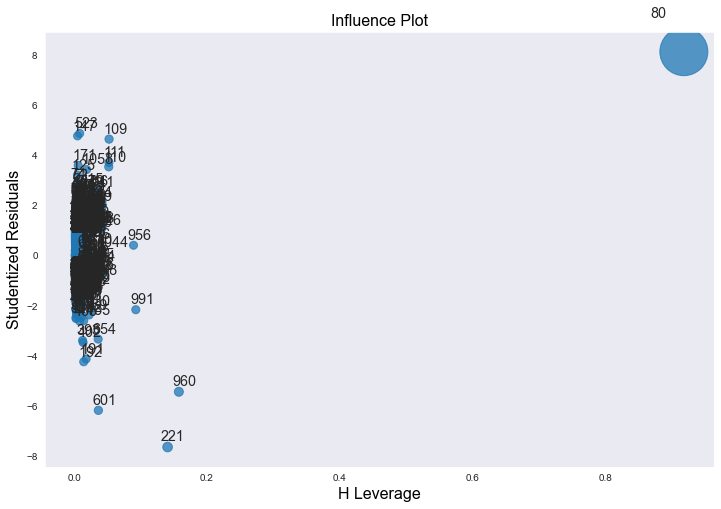

In [289]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax= ax, criterion="cooks", alpha = 0.5)

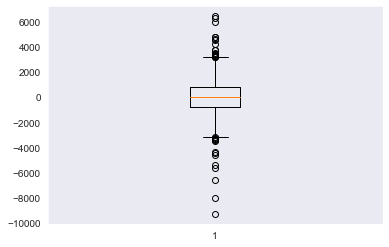

In [290]:
column=plt.boxplot(model.resid)

In [291]:
[item.get_ydata()for item in column["fliers"]]

[array([-3291.95887083, -5445.33797169, -5606.22471183, -9303.07039107,
        -3189.7172898 , -3359.85389476, -4489.58001384, -4596.34786048,
        -3493.19216243, -8017.91859798, -4370.21529673, -6618.13745557,
        -3298.27277188, -3446.0875261 ,  3382.75859622,  3754.47209515,
         3767.90588144,  3202.30272503,  6010.60119672,  4593.53039677,
         4816.68668581,  3493.23625923,  4273.23906659,  3302.90653649,
         6326.04879415,  3434.82652549,  3276.92799311,  4781.09083037,
         6445.39116006,  3204.97576182,  4532.80288832,  3399.44821293])]

In [292]:
whisker=[item.get_ydata()[1] for item in column["whiskers"]]
whisker

[-3136.6452836109165, 3180.0385166969336]

In [293]:
outliers_index=(model.resid).isin([item.get_ydata()for item in column["fliers"]])

In [294]:
outliers=[item.get_ydata()for item in column["fliers"]]
outliers=list(outliers)

In [295]:
residu=np.array(model.resid)
residu=pd.DataFrame(residu)
residu

,0
0,-3291.958871
1,-2503.800414
2,-2829.635210
3,-1455.789389
4,-2450.217277
...,...
1430,-1294.255037
1431,2552.422658
1432,44.565598
1433,-1329.222041


In [296]:
outliers


[array([-3291.95887083, -5445.33797169, -5606.22471183, -9303.07039107,
        -3189.7172898 , -3359.85389476, -4489.58001384, -4596.34786048,
        -3493.19216243, -8017.91859798, -4370.21529673, -6618.13745557,
        -3298.27277188, -3446.0875261 ,  3382.75859622,  3754.47209515,
         3767.90588144,  3202.30272503,  6010.60119672,  4593.53039677,
         4816.68668581,  3493.23625923,  4273.23906659,  3302.90653649,
         6326.04879415,  3434.82652549,  3276.92799311,  4781.09083037,
         6445.39116006,  3204.97576182,  4532.80288832,  3399.44821293])]

In [297]:
residu=model.resid

In [298]:
outliers_index=np.where(np.isin(residu,outliers))
outliers_index=list(outliers_index)
outliers_index=np.array(outliers_index)
outliers_index

array([[   0,   16,   52,   74,   91,  109,  110,  111,  114,  124,  140,
         146,  153,  160,  170,  190,  191,  220,  253,  320,  392,  401,
         462,  522,  556,  600,  653,  959, 1057, 1078, 1381, 1434]],
      dtype=int64)

In [299]:
outliers_index=[ 0,   16,   52,   74,   91,  109,  110,  111,  114,  124,  140,
         146,  153,  160,  170,  190,  191,  220,  253,  320,  392,  401,
         462,  522,  556,  600,  653,  959, 1057, 1078, 1381, 1434]


In [300]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 144.4 KB


In [301]:
totyota=pd.read_csv("ToyotaCorolla.csv", encoding="unicode_escape")
totyota= totyota.drop("Id", axis=1)
corolla=totyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla.head()
corolla.duplicated().sum()
corolla=corolla.drop_duplicates()

In [302]:
corolla=corolla.drop(corolla.index[outliers_index], axis=0)

In [303]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403 entries, 1 to 1434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1403 non-null   int64
 1   Age_08_04      1403 non-null   int64
 2   KM             1403 non-null   int64
 3   HP             1403 non-null   int64
 4   cc             1403 non-null   int64
 5   Doors          1403 non-null   int64
 6   Gears          1403 non-null   int64
 7   Quarterly_Tax  1403 non-null   int64
 8   Weight         1403 non-null   int64
dtypes: int64(9)
memory usage: 109.6 KB


Suspected outliers and influence points are removed so Creating model again

In [304]:
corolla.head(1)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1,13750,23,72937,90,2000,3,5,210,1165


In [305]:
N_Model=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", corolla).fit()

In [306]:
N_Model.params

Intercept       -12195.995411
Age_08_04         -113.935873
KM                  -0.020278
HP                  18.808638
cc                  -0.125234
Doors              -65.311778
Gears              703.161808
Quarterly_Tax       -4.089422
Weight              24.309370
dtype: float64

In [307]:
N_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1354.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:34:10   Log-Likelihood:                -11844.
No. Observations:                1403   AIC:                         2.371e+04
Df Residuals:                    1394   BIC:                         2.375e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.22e+04   1411.032     -8.643      0.000    -1.5e+04   -9428.021
Age_08_04      -113.9359      2.331    -48.868      0.000    -118.509    -109.362
KM               -0.0203      0.001    -18.696      0.000      -0.022      -0.018
HP               18.8086      2.539      7.408      0.000      13.828      23.789
cc               -0.1252      0.077     -1.634      0.103      -0.276       0.025
Doors           -65.3118     34.912     -1.871      0.062    -133.797       3.173
Gears           703.1618    165.984      4.236      0.000     377.557    1028.767
Quarterly_Tax    -4.0894      1.256     -3.256      0.001      -6.554      -1.625
Weight           24.3094      1.235     19.687      0.000      21.887      26.732
==============================================================================
Omnibus:                        1.745   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.692
Skew:                           0.084   Prob(JB):                        0.429
Kurtosis:                       3.021   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [308]:
N_Model.rsquared, N_Model.rsquared_adj

(0.8859792115323902, 0.885324859805173)

In [309]:
model.rsquared, model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

CC and Doors Feature are insignificant so Dropping them

In [310]:
corolla.drop(corolla[["cc", "Doors"]], axis=1)

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170
5,12950,32,61000,90,5,210,1170
...,...,...,...,...,...,...,...
1430,8450,80,23000,86,5,69,1015
1431,7500,69,20544,86,5,69,1025
1432,10845,72,19000,86,5,69,1015
1433,8500,71,17016,86,5,69,1015


In [311]:
N_Model2=smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight", corolla).fit()

In [312]:
N_Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1799.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:34:11   Log-Likelihood:                -11847.
No. Observations:                1403   AIC:                         2.371e+04
Df Residuals:                    1396   BIC:                         2.375e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.171e+04   1397.901     -8.373      0.000   -1.44e+04   -8962.938
Age_08_04      -114.4403      2.325    -49.214      0.000    -119.002    -109.879
KM               -0.0203      0.001    -18.754      0.000      -0.022      -0.018
HP               18.3667      2.534      7.247      0.000      13.395      23.338
Gears           767.3300    162.965      4.709      0.000     447.648    1087.012
Quarterly_Tax    -3.9080      1.242     -3.147      0.002      -6.344      -1.472
Weight           23.1772      1.142     20.297      0.000      20.937      25.417
==============================================================================
Omnibus:                        1.509   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.492
Skew:                           0.080   Prob(JB):                        0.474
Kurtosis:                       2.997   Cond. No.                     3.64e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Normal QQ plot of Reisdual')

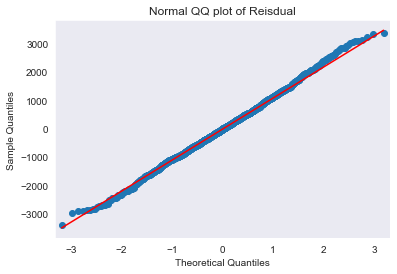

In [313]:
qqplot=sm.qqplot(N_Model2.resid, line="q")
plt.title("Normal QQ plot of Reisdual")

In [314]:
model_influence=N_Model2.get_influence()
(c,_)=model_influence.cooks_distance

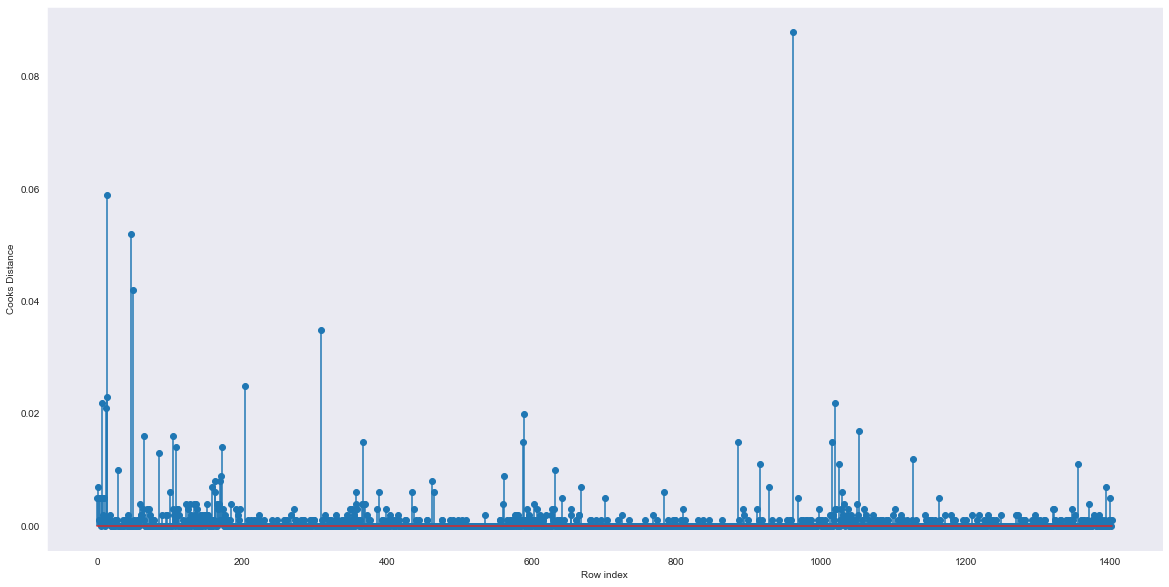

In [315]:
fig = plt.subplots(figsize=(20, 10))
plt.stem(np.arange(len(corolla)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

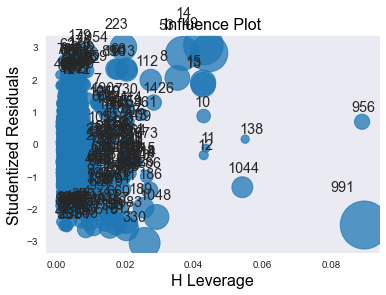

In [316]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(N_Model2)
plt.show()

In [317]:
k = corolla.shape[1]
n = corolla.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.021382751247327157

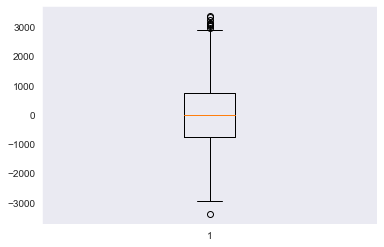

In [318]:
column=plt.boxplot(N_Model2.resid)

In [319]:
outliers=[item.get_ydata()for item in column["fliers"]]
outlier_index=np.where(np.isin(N_Model2.resid,outliers))
outlier_index
corolla=corolla.drop(corolla.index[outlier_index], axis=0)

In [320]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 1 to 1434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1393 non-null   int64
 1   Age_08_04      1393 non-null   int64
 2   KM             1393 non-null   int64
 3   HP             1393 non-null   int64
 4   cc             1393 non-null   int64
 5   Doors          1393 non-null   int64
 6   Gears          1393 non-null   int64
 7   Quarterly_Tax  1393 non-null   int64
 8   Weight         1393 non-null   int64
dtypes: int64(9)
memory usage: 108.8 KB


In [321]:
N_Model3=smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight", corolla).fit()

In [322]:
N_Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1791.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:34:15   Log-Likelihood:                -11725.
No. Observations:                1393   AIC:                         2.346e+04
Df Residuals:                    1386   BIC:                         2.350e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.142e+04   1388.464     -8.225      0.000   -1.41e+04   -8695.710
Age_08_04      -113.1638      2.271    -49.826      0.000    -117.619    -108.708
KM               -0.0207      0.001    -19.525      0.000      -0.023      -0.019
HP               14.1441      2.561      5.523      0.000       9.120      19.168
Gears           776.3414    162.087      4.790      0.000     458.379    1094.304
Quarterly_Tax    -4.7772      1.225     -3.900      0.000      -7.180      -2.374
Weight           23.2742      1.120     20.773      0.000      21.076      25.472
==============================================================================
Omnibus:                        0.349   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.840   Jarque-Bera (JB):                0.427
Skew:                           0.014   Prob(JB):                        0.808
Kurtosis:                       2.919   Cond. No.                     3.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Normal QQ plot of Reisdual')

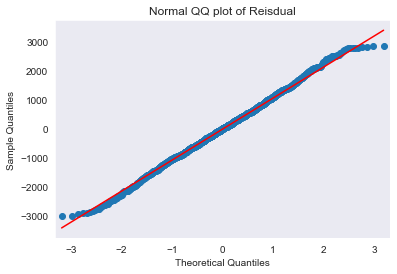

In [323]:
qqplot=sm.qqplot(N_Model3.resid, line="q")
plt.title("Normal QQ plot of Reisdual")

Text(0.5, 1.0, 'Normal QQ plot of Reisdual')

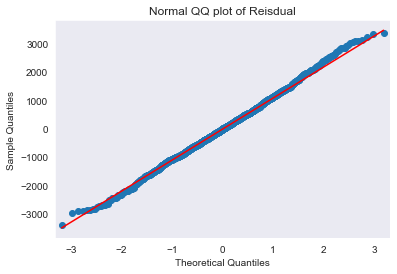

In [324]:
qqplot=sm.qqplot(N_Model2.resid, line="q")
plt.title("Normal QQ plot of Reisdual")

In [325]:
model_influence=N_Model3.get_influence()
(c,_)=model_influence.cooks_distance

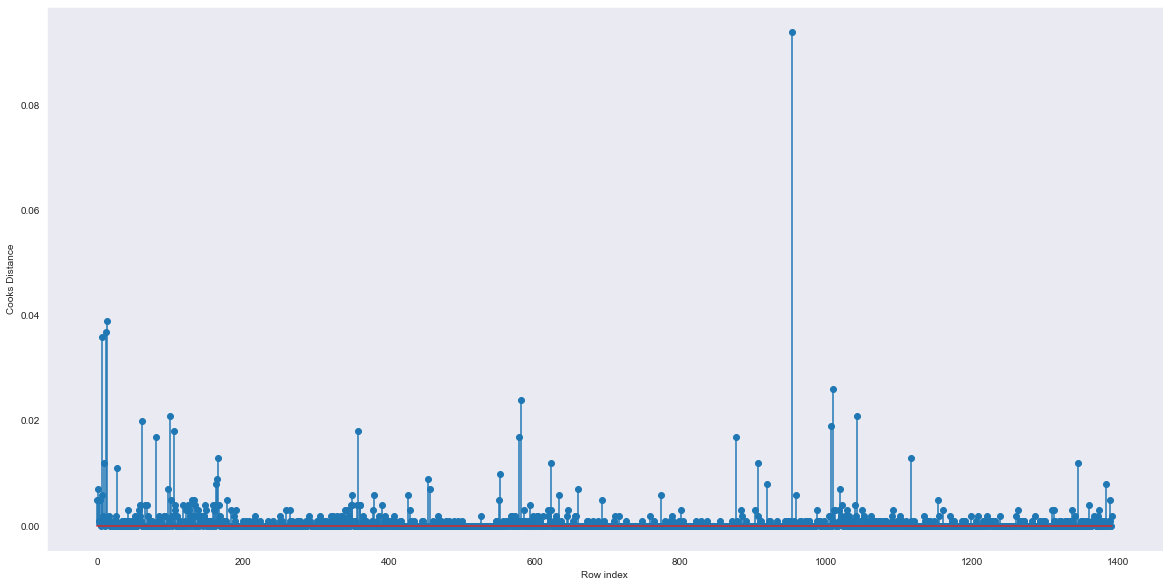

In [326]:
fig = plt.subplots(figsize=(20, 10))
plt.stem(np.arange(len(corolla)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

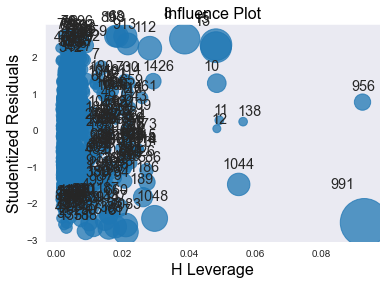

In [327]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(N_Model3)
plt.show()

In [328]:
k = corolla.shape[1]
n = corolla.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.021536252692031584

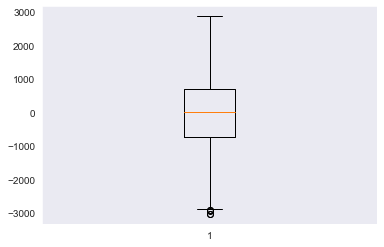

In [329]:
column=plt.boxplot(N_Model3.resid)

In [330]:
outliers=[item.get_ydata()for item in column["fliers"]]
outlier_index=np.where(np.isin(N_Model3.resid,outliers))
outlier_index
corolla=corolla.drop(corolla.index[outlier_index], axis=0)

In [331]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 1 to 1434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1388 non-null   int64
 1   Age_08_04      1388 non-null   int64
 2   KM             1388 non-null   int64
 3   HP             1388 non-null   int64
 4   cc             1388 non-null   int64
 5   Doors          1388 non-null   int64
 6   Gears          1388 non-null   int64
 7   Quarterly_Tax  1388 non-null   int64
 8   Weight         1388 non-null   int64
dtypes: int64(9)
memory usage: 108.4 KB


In [332]:
N_Model4=smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight", corolla).fit()

In [333]:
N_Model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1833.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:34:18   Log-Likelihood:                -11666.
No. Observations:                1388   AIC:                         2.335e+04
Df Residuals:                    1381   BIC:                         2.338e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.239e+04   1382.236     -8.964      0.000   -1.51e+04   -9679.265
Age_08_04      -112.8282      2.245    -50.246      0.000    -117.233    -108.423
KM               -0.0205      0.001    -19.514      0.000      -0.023      -0.018
HP               12.0372      2.555      4.712      0.000       7.026      17.048
Gears           792.6594    160.160      4.949      0.000     478.476    1106.843
Quarterly_Tax    -6.1567      1.234     -4.989      0.000      -8.578      -3.736
Weight           24.3983      1.124     21.709      0.000      22.194      26.603
==============================================================================
Omnibus:                        0.987   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                1.059
Skew:                           0.045   Prob(JB):                        0.589
Kurtosis:                       2.900   Cond. No.                     3.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

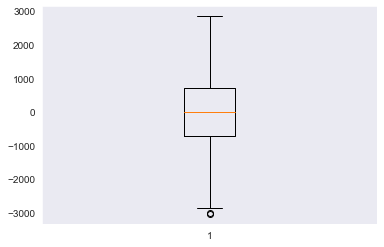

In [334]:
column=plt.boxplot(N_Model4.resid)

In [335]:
outliers=[item.get_ydata()for item in column["fliers"]]
outlier_index=np.where(np.isin(N_Model4.resid,outliers))
outlier_index
corolla=corolla.drop(corolla.index[outlier_index], axis=0)

In [336]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 1 to 1434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1386 non-null   int64
 1   Age_08_04      1386 non-null   int64
 2   KM             1386 non-null   int64
 3   HP             1386 non-null   int64
 4   cc             1386 non-null   int64
 5   Doors          1386 non-null   int64
 6   Gears          1386 non-null   int64
 7   Quarterly_Tax  1386 non-null   int64
 8   Weight         1386 non-null   int64
dtypes: int64(9)
memory usage: 108.3 KB


In [337]:
N_Model5=smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight", corolla).fit()

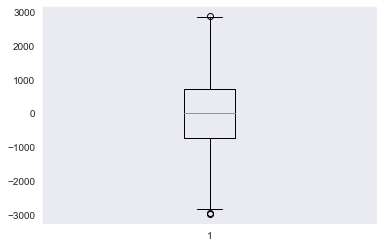

In [338]:
column=plt.boxplot(N_Model5.resid)

In [339]:
outliers=[item.get_ydata()for item in column["fliers"]]
outlier_index=(np.where(np.isin(N_Model5.resid,outliers)))
outlier_index
corolla=corolla.drop(corolla.index[outlier_index], axis=0)

In [340]:
corolla.shape

(1383, 9)

In [341]:
def outlier_removal(corolla):
    def_Model=smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight", corolla).fit()
    column=plt.boxplot(def_Model.resid)
    outliers=[item.get_ydata()for item in column["fliers"]]
    outlier_index=np.where(np.isin(def_Model.resid,outliers))
    outlier_index1=outlier_index[0].astype("int64")
    len(outlier_index1)
    count_outlier=len(outlier_index1)
    while count_outlier>0:
        corolla=corolla.drop(corolla.index[outlier_index], axis=0)
        def_Model=smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight", corolla).fit()
        column=plt.boxplot(def_Model.resid)
        outliers=[item.get_ydata()for item in column["fliers"]]
        outlier_index=np.where(np.isin(def_Model.resid,outliers))
        outlier_index1=outlier_index[0].astype("int64")
        count_outlier=len(outlier_index1)
    else:
        return def_Model, corolla
    

In [342]:
N_Model6=smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight", corolla).fit()

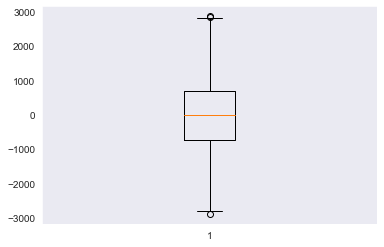

In [343]:
column=plt.boxplot(N_Model6.resid)

In [344]:
outliers=[item.get_ydata()for item in column["fliers"]]
outlier_index=(np.where(np.isin(N_Model6.resid,outliers)))
outlier_index
corolla=corolla.drop(corolla.index[outlier_index], axis=0)

In [345]:
corolla.shape

(1380, 9)

In [346]:
N_Model7=smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight", corolla).fit()

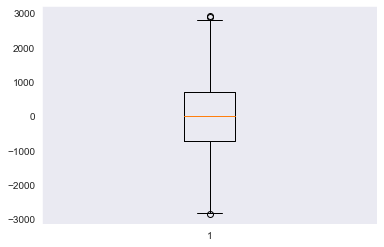

In [347]:
column=plt.boxplot(N_Model7.resid)

In [348]:
outliers=[item.get_ydata()for item in column["fliers"]]
outlier_index=(np.where(np.isin(N_Model7.resid,outliers)))
outlier_index
corolla=corolla.drop(corolla.index[outlier_index], axis=0)

In [349]:
corolla.shape

(1377, 9)

In [350]:
outlier_index

(array([  59,  102, 1332], dtype=int64),)

In [351]:
outlier_index1=outlier_index[0].astype("int64")
len(outlier_index1)

3

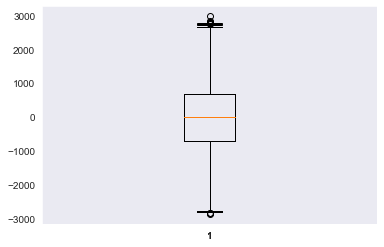

In [352]:
Data=outlier_removal(corolla)

In [353]:
corolla=Data[1]
corolla.shape

(1366, 9)

In [354]:
Final_model=Data[0]
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1835.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:34:20   Log-Likelihood:                -11409.
No. Observations:                1366   AIC:                         2.283e+04
Df Residuals:                    1359   BIC:                         2.287e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -1.3e+04   1376.819     -9.444      0.000   -1.57e+04   -1.03e+04
Age_08_04      -111.6211      2.153    -51.844      0.000    -115.845    -107.397
KM               -0.0190      0.001    -18.761      0.000      -0.021      -0.017
HP                3.7418      2.582      1.449      0.148      -1.324       8.808
Gears           763.4775    153.940      4.960      0.000     461.492    1065.463
Quarterly_Tax   -10.4500      1.248     -8.373      0.000     -12.898      -8.002
Weight           26.0717      1.134     22.981      0.000      23.846      28.297
==============================================================================
Omnibus:                        2.690   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.484
Skew:                           0.041   Prob(JB):                        0.289
Kurtosis:                       2.808   Cond. No.                     3.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{'whiskers': [<matplotlib.lines.Line2D at 0x1ddeb3ab790>,
 'caps': [<matplotlib.lines.Line2D at 0x1ddeb3abd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ddeb3ab400>],
 'medians': [<matplotlib.lines.Line2D at 0x1ddeb3b84f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ddeb3b8880>],
 'means': []}

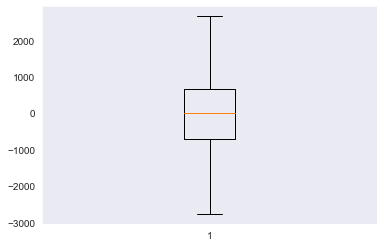

In [355]:
plt.boxplot(Final_model.resid)

In [356]:
Final_model.rsquared, Final_model.rsquared_adj

(0.8901171536387381, 0.8896320196592182)

In [357]:
Final_model.rsquared

0.8901171536387381

## All Model Detail

In [358]:
data={"Model Name":["Model","N_Model","N_Model2","N_Model3","N_Model4","N_Model5","N_Model6","N_Model7","Final_Model"],"Model rsquared":[model.rsquared, N_Model.rsquared,N_Model2.rsquared,N_Model3.rsquared,N_Model4.rsquared,N_Model5.rsquared,N_Model6.rsquared,N_Model7.rsquared, Final_model.rsquared],"Models_Adj Rsquare":[model.rsquared_adj, N_Model.rsquared_adj,N_Model2.rsquared_adj,N_Model3.rsquared_adj,N_Model4.rsquared_adj,N_Model5.rsquared_adj,N_Model6.rsquared_adj,N_Model7.rsquared_adj,Final_model.rsquared_adj]}

In [359]:

Model_details=pd.DataFrame(data)
Model_details

,Model Name,Model rsquared,Models_Adj Rsquare
0,Model,0.862520,0.861749
1,N_Model,0.885979,0.885325
2,N_Model2,0.885498,0.885006
3,N_Model3,0.885777,0.885283
4,N_Model4,0.888455,0.887970
5,N_Model5,0.889546,0.889066
6,N_Model6,0.890971,0.890495
7,N_Model7,0.890837,0.890360
8,Final_Model,0.890117,0.889632
